# Import necessary libraries

In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

from sklearn.datasets import load_wine

# Load Dataset

In [42]:
wine = load_wine()
# print(wine.DESCR)
X = wine.data
y = wine.target

df = pd.DataFrame(X, columns=wine.feature_names)
df["target"] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# Scale dataset

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]], shape=(178, 13))

# Elbow method for finding optimum number of k

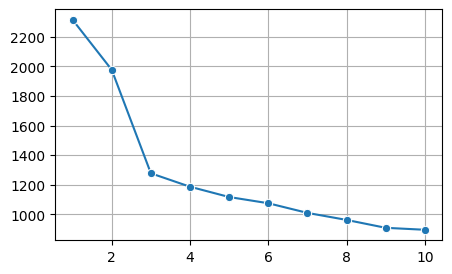

In [44]:
inertia = []
cl_range = range(1, 11)

for i in cl_range:
    model = KMeans(n_clusters=i)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(5, 3))
sns.lineplot(x=cl_range, y=inertia, marker="o")
plt.grid(True)
plt.show()

# Modeling KMeans

In [45]:
optimum_k = 3
model = KMeans(n_clusters=optimum_k, random_state=42)
model.fit(X_scaled)
# print(y)
print(model.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# Plotting Kmeans

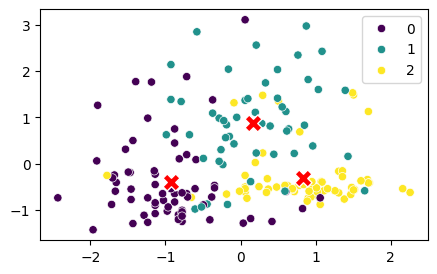

In [46]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x = X_scaled[:, 0], y = X_scaled[:, 1], hue=model.labels_, palette="viridis")
sns.scatterplot(x = model.cluster_centers_[:, 0], y = model.cluster_centers_[:, 1], c="red", marker="X", s=150)
plt.show()

# Dimensionality Reduction using PCA

In [51]:
X_scaled.shape

(178, 13)

In [50]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00,  2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00,  2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00,  2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]],
      shape=(178, 13))

# KMeans after reducing

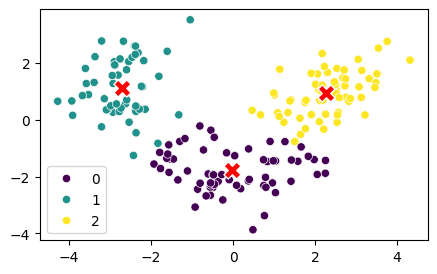

In [ ]:
model = KMeans(n_clusters=optimum_k, random_state=42)
model.fit(X_pca)
# print(model.labels_)
plt.figure(figsize=(5, 3))
sns.scatterplot(x = X_pca[:, 0], y = X_pca[:, 1], hue=model.labels_, palette="viridis")
sns.scatterplot(x = model.cluster_centers_[:, 0], y = model.cluster_centers_[:, 1], c="red", marker="X", s=150)
plt.show()

# Evaluation Metrics
*silhouette_score, davies_bouldin_score, calinski_harabasz_score*

In [53]:
ss = silhouette_score(X_pca, model.labels_)
db = davies_bouldin_score(X_pca, model.labels_)
ch = calinski_harabasz_score(X_pca, model.labels_)
print(ss, db, ch, sep="\n")

0.28485891918989875
1.3891879777181642
70.94000800315125


# Hierarchical Clustering Agglomerative

# Plotting Dendrogram

# Evaluation Metrics

# Comparison

## Assignment for Students:
---
### 1. Load the Iris Dataset
- Load the Iris dataset using `sklearn.datasets.load_iris()`.
- Split the dataset into features (`X`) and target (`y`).

### 2. Data Preprocessing
- Scale the features using `StandardScaler` or `MinMaxScaler` to ensure they are on the same scale for clustering.

### 3. K-Means Clustering:
- Apply K-Means clustering on the scaled data and use the **Elbow Method** to determine the optimal number of clusters.
- Create a plot of inertia vs. the number of clusters to visualize the elbow.
- Apply K-Means using the chosen optimal number of clusters (e.g., `optimal_k = 3`).
- Plot the clusters and the centroids.

### 4. Apply PCA for Dimensionality Reduction
- Use **PCA** to reduce the data to 2 components for better visualization.
- Apply K-Means on the PCA-transformed data and plot the results.

### 5. Cluster Validation:
- Calculate the **silhouette score**, **Davies-Bouldin score**, and **Calinski-Harabasz score** for the K-Means clustering.
- Print the validation scores.

### 6. Hierarchical Clustering:
- Apply **Agglomerative Clustering** (Hierarchical Clustering) on the scaled Iris data.
- Plot a **dendrogram** to visualize the hierarchical clustering.
- Plot the clusters obtained from Hierarchical clustering in the feature space.
- Apply PCA to visualize the hierarchical clusters in the reduced 2D space.

### 7. Validation for Hierarchical Clustering:
- Calculate the **silhouette score**, **Davies-Bouldin score**, and **Calinski-Harabasz score** for Hierarchical clustering and print the results.

### 8. Comparison between K-Means and Hierarchical Clustering:
- **Graphical Comparison:**
    - Create side-by-side scatter plots comparing the clusters formed by K-Means and Hierarchical clustering in both the feature space and the PCA-reduced space.
    - Display the centroids for K-Means and the hierarchical clustering labels.

- **Textual Analysis:**
    - Compare the clustering results from K-Means and Hierarchical clustering. Discuss how the clusters differ or overlap.
    - Compare the validation scores (Silhouette Score, Davies-Bouldin Score, Calinski-Harabasz Score) between the two methods. Which method performs better, and why?
    - Discuss the characteristics of both clustering techniques and the advantages or limitations of each based on the Iris dataset.
---

